In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
from tensorflow.keras.optimizers import Adam

(train_images, _), (_, _) = mnist.load_data()

train_images = (train_images.astype(np.float32) - 127.5) / 127.5
train_images = np.expand_dims(train_images, axis=-1)

def build_generator():
    generator = Sequential([
        Dense(256, input_shape=(100,)),
        LeakyReLU(alpha=0.2),
        BatchNormalization(momentum=0.8),
        Dense(512),
        LeakyReLU(alpha=0.2),
        BatchNormalization(momentum=0.8),
        Dense(28 * 28 * 1, activation='tanh'),
        Reshape((28, 28, 1))
    ])
    return generator

def build_discriminator():
    discriminator = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(512),
        LeakyReLU(alpha=0.2),
        Dense(256),
        LeakyReLU(alpha=0.2),
        Dense(1, activation='sigmoid')
    ])
    return discriminator

generator = build_generator()
discriminator = build_discriminator()

discriminator.compile(optimizer=Adam(lr=0.0002, beta_1=0.5), loss='binary_crossentropy', metrics=['accuracy'])
discriminator.trainable = False

gan_input = Input(shape=(100,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)

gan = Model(gan_input, gan_output)
gan.compile(optimizer=Adam(lr=0.0002, beta_1=0.5), loss='binary_crossentropy')

batch_size = 256
epochs = 10000

for epoch in range(epochs):
    idx = np.random.randint(0, train_images.shape[0], batch_size)
    real_images = train_images[idx]

    noise = np.random.normal(0, 1, (batch_size, 100))
    fake_images = generator.predict(noise)

    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))
    d_loss_real = discriminator.train_on_batch(real_images, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = gan.train_on_batch(noise, real_labels)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: D Loss: {d_loss[0]}, G Loss: {g_loss}")

generator.save('mnist_generator.h5')

11490434/11490434 [==============================] - 0s 0us/step


Streaming output truncated to the last 5000 lines.
8/8 [==============================] - 0s 6ms/step
Epoch 5100: D Loss: 0.6550962030887604, G Loss: 1.0232075452804565
8/8 [==============================] - 0s 6ms/step
Epoch 5200: D Loss: 0.6676301956176758, G Loss: 1.0462684631347656
8/8 [==============================] - 0s 7ms/step
Epoch 5300: D Loss: 0.6478347778320312, G Loss: 1.027986764907837
8/8 [==============================] - 0s 5ms/step
Epoch 5400: D Loss: 0.6556879281997681, G Loss: 1.1346253156661987
8/8 [==============================] - 0s 6ms/step
Epoch 5500: D Loss: 0.6266782283782959, G Loss: 1.0786443948745728
8/8 [==============================] - 0s 6ms/step
Epoch 5600: D Loss: 0.6432390809059143, G Loss: 1.101582646369934
8/8 [==============================] - 0s 8ms/step
Epoch 5700: D Loss: 0.6706909239292145, G Loss: 1.0743720531463623
8/8 [==============================] - 0s 6ms/step
Epoch 5800: D Loss: 0.6518921852111816, G Loss: 1.0839581489562988
8/8 [==

1/1 [==============================] - 0s 133ms/step


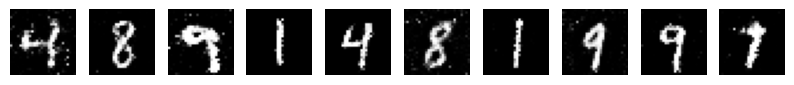

In [ ]:
from tensorflow.keras.models import load_model

generator = load_model('mnist_generator.h5')

noise = np.random.normal(0, 1, (10, 100))

generated_images = generator.predict(noise)

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()